In [68]:
#import needed modules
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
#load up and preview our dataset
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
#subset our data and preview it
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


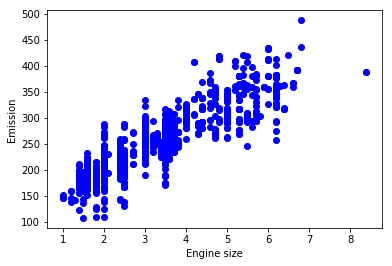

In [5]:
#plot emissions x engine size
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [10]:
#this will subset our dataset into training and testing datasets
msk = np.random.rand(len(df)) < 0.8 #this creates a mask of 80% of our dataset.
train = cdf[msk] #our training dataset is 80% of our data
test = cdf[~msk] #this returns the compliment of the mask, which is 20% of our data for testing

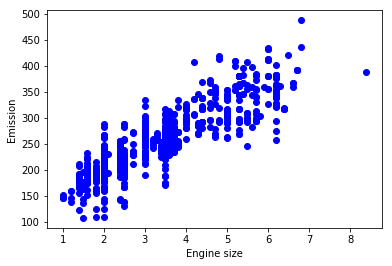

In [11]:
#plots the training data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

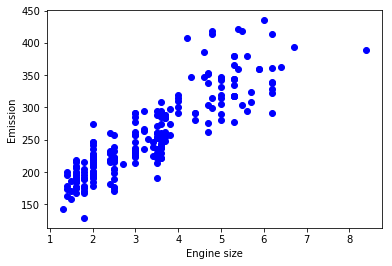

In [12]:
#plots the testing dataset
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [17]:
regr = linear_model.LinearRegression() #the model well use
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]) #training our independant variables
train_y = np.asanyarray(train[['CO2EMISSIONS']]) #training our dependant variable
regr.fit (train_x, train_y) #our regression
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.41208687  7.66850006  9.64629405]]


C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


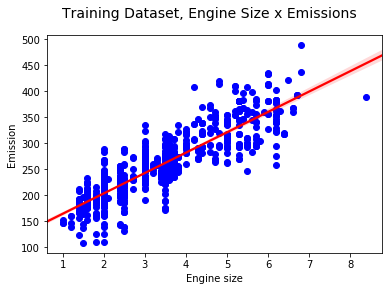

In [73]:
#this creates the regression plot of engine size x emissions in the training dataset
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue') #creates the points of the scatterplots
sns.regplot(x=train.ENGINESIZE,y=train.CO2EMISSIONS,color='red', marker='')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.suptitle('Training Dataset, Engine Size x Emissions', fontsize=14)
plt.savefig('carsTrainingEmissions.png',dpi=800)

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


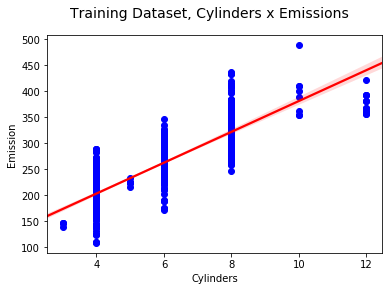

In [57]:
#this creates the regression plot of cylinders x emissions in the training dataset
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue') #creates the points of the scatterplots
sns.regplot(x=train.CYLINDERS,y=train.CO2EMISSIONS,color='red', marker='')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.suptitle('Training Dataset, Cylinders x Emissions', fontsize=14)
plt.savefig('carsTrainingCylinders.png',dpi=800)

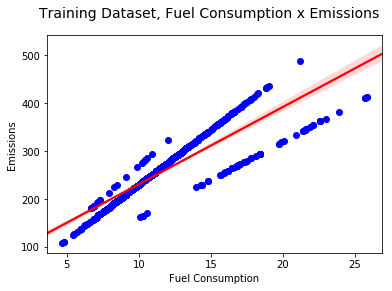

In [58]:
#this creates the regression plot of fuel consumption x emissions in the training dataset
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue') #creates the points of the scatterplots
sns.regplot(x=train.FUELCONSUMPTION_COMB,y=train.CO2EMISSIONS,color='red', marker='')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emissions")
plt.suptitle('Training Dataset, Fuel Consumption x Emissions', fontsize=14)
plt.savefig('carsTrainingFuel.png',dpi=800)

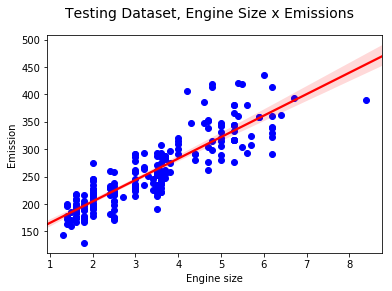

In [62]:
#this plots the model we've created for testing engine size x emission
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='blue') #creates the points of the scatterplots
sns.regplot(x=test.ENGINESIZE,y=test.CO2EMISSIONS,color='red', marker='')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.suptitle('Testing Dataset, Engine Size x Emissions', fontsize=14)
plt.savefig('carsTestingEngine.png',dpi=800)

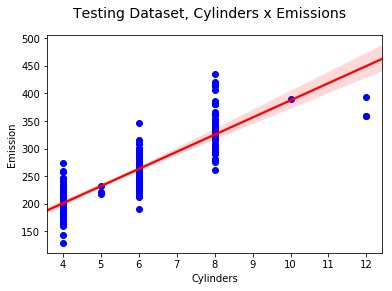

In [63]:
#this creates the regression plot of cylinders x emissions in the testing dataset
plt.scatter(test.CYLINDERS, test.CO2EMISSIONS,  color='blue') #creates the points of the scatterplots
sns.regplot(x=test.CYLINDERS,y=test.CO2EMISSIONS,color='red', marker='')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.suptitle('Testing Dataset, Cylinders x Emissions', fontsize=14)
plt.savefig('carsTestingCylinders.png',dpi=800)

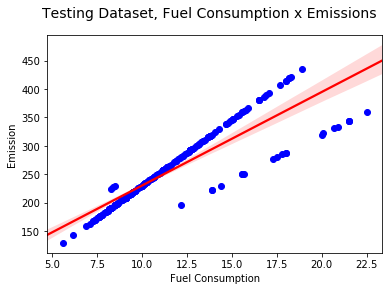

In [64]:
#this creates the regression plot of fuel consumption x emissions in the testing dataset
plt.scatter(test.FUELCONSUMPTION_COMB, test.CO2EMISSIONS,  color='blue') #creates the points of the scatterplots
sns.regplot(x=test.FUELCONSUMPTION_COMB,y=test.CO2EMISSIONS,color='red', marker='')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.suptitle('Testing Dataset, Fuel Consumption x Emissions', fontsize=14)
plt.savefig('carsTestingFuel.png',dpi=800)

In [71]:
#these will grab our evaluation metrics of the model.
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]) #our regression line
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]) #our independent variables
test_y = np.asanyarray(test[['CO2EMISSIONS']]) #our dependent variables
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))

Residual sum of squares: 553.98
Variance score: 0.86
R2-score: 0.84
Mean absolute error: 16.46
